In [26]:
import pandas as pd
import numpy as np
from omadb import Client
import logging
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [27]:
#style options
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.0, 8.0)

#seaborn options
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=1.5)
sns.set_style('whitegrid')
palette="husl"

In [28]:
metfol =['OMAAugustus20', 'OMARP20', 'OMAtopNCBI20', 'OMAtopEnsembl20']
allmetfol= ['OMAAugustus20', 'OMARP20', 'OMAtopNCBI20', 'OMAprimNCBI20', 'OMAtopEnsembl20', 'OMAprimEnsembl20']

In [29]:
working_dir='/users/sprietob/mywork/OMARP20/'

In [30]:
hog_profiles_df = pd.read_csv(working_dir + '/Output/PhyleticProfileHOGs.txt', skiprows=4, sep="\t")
hog_profiles_df['total_nb_genes'] = hog_profiles_df.select_dtypes(include='number').sum(axis=1).to_frame()

In [42]:
type(hog_profiles_total['Method'])

pandas.core.series.Series

In [6]:
hog_profiles_df

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,...,MOUSE,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes
0,HOG00001,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
1,HOG00002,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,HOG00004,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
4,HOG00005,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30653,HOG30654,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,3
30654,HOG30655,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
30655,HOG30656,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
30656,HOG30657,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [31]:
## Stats per method

Measure=['HOG_count', 'mean','std', 'min', '25%', '50%', '75%', 'max']
HOGstats=pd.DataFrame(data=Measure, columns=['Measure'])
hog_profiles_total= pd.DataFrame()

for m in allmetfol:
    working_dir =  '/users/sprietob/mywork/' + m
    hog_profiles = pd.read_csv(working_dir + '/Output/PhyleticProfileHOGs.txt', skiprows=4, sep="\t")
    hog_profiles['total_nb_genes'] = hog_profiles.select_dtypes(include='number').sum(axis=1)
    
    tmp_series=hog_profiles['total_nb_genes'].describe()
    tmp_df=tmp_series.to_frame()
    current=tmp_df['total_nb_genes'].tolist()
    HOGstats[m]=current
    
    hog_profiles['Method']= m
    hog_profiles_total = pd.concat([hog_profiles_total, hog_profiles], ignore_index=True)

In [32]:
set(hog_profiles_total['Method'].tolist())

{'OMAAugustus20',
 'OMARP20',
 'OMAprimEnsembl20',
 'OMAprimNCBI20',
 'OMAtopEnsembl20',
 'OMAtopNCBI20'}

In [41]:
hog_profiles_total.loc[hog_profiles_total['total_nb_genes']>600].groupby['Method'].describe()

TypeError: 'method' object is not subscriptable

<Axes: xlabel='total_nb_genes', ylabel='Count'>

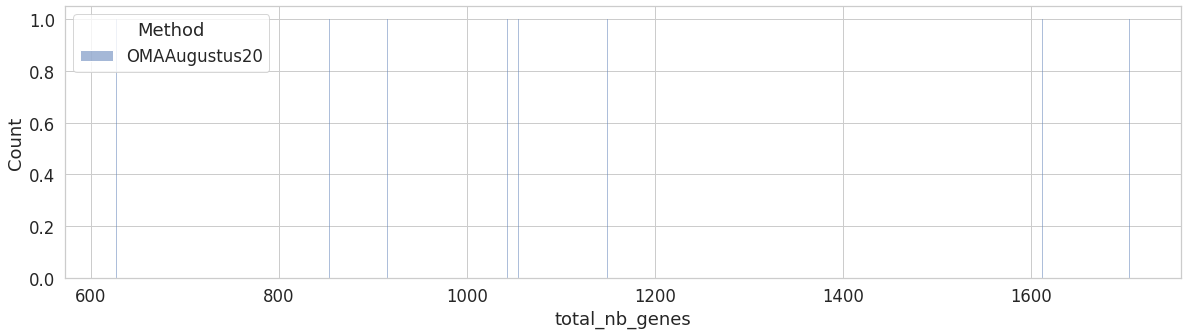

In [34]:
hogprofiles = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]>600]
fig=plt.subplots(figsize=(20,5))
tmphogprofiles = hogprofiles.loc[hogprofiles["Method"]=='OMAAugustus20']

sns.histplot(tmphogprofiles, hue='Method', x='total_nb_genes', discrete=True, )

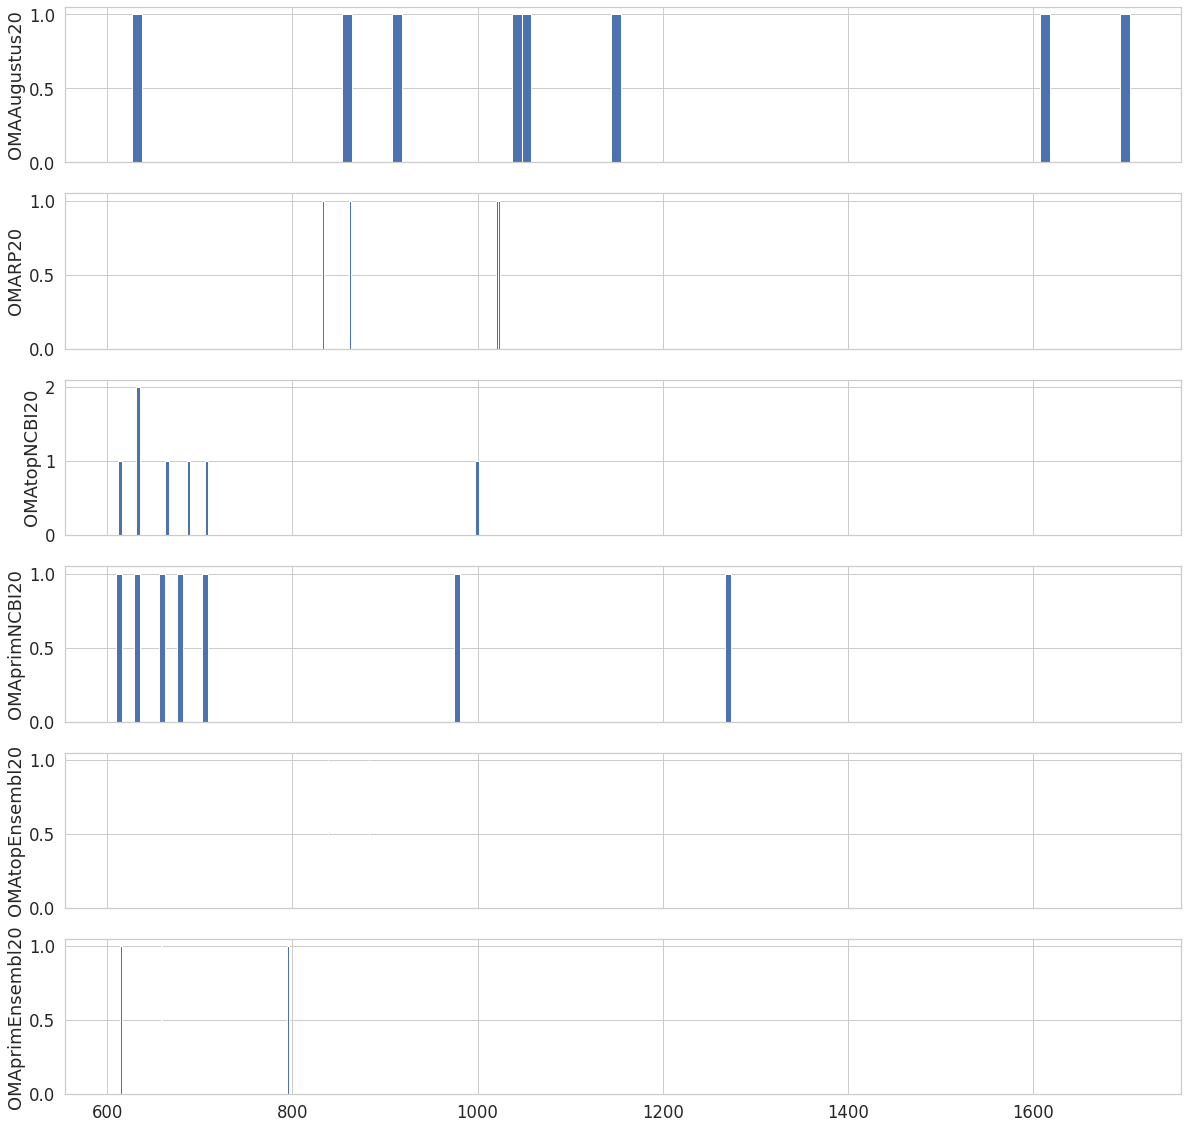

In [37]:
hogprofiles = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]>600]
hogprofiles = hogprofiles.loc[hog_profiles_total["total_nb_genes"]<7000]

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, figsize=(20,20))
axis=[ax1, ax2, ax3, ax4, ax5, ax6]
for i in range(len(allmetfol)): 
    tmphogprofiles = hogprofiles.loc[hogprofiles["Method"]==allmetfol[i]]
    currentaxis = axis[i]
    currentaxis.hist(tmphogprofiles['total_nb_genes'], bins=100) #, bins=250
    currentaxis.set(ylabel=allmetfol[i])

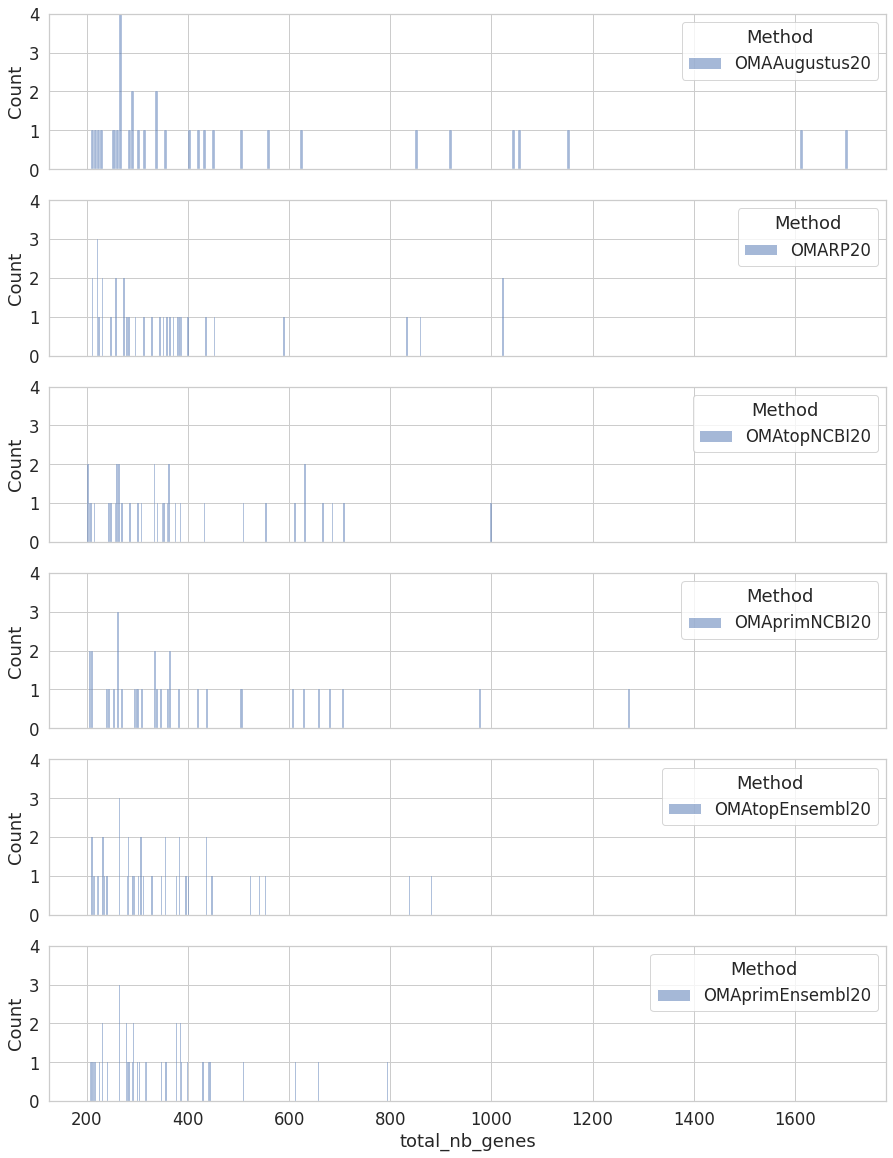

In [38]:
hogprofiles = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]>200]
#hogprofiles = hogprofiles.loc[hogprofiles["total_nb_genes"]>600]
hogprofiles = hogprofiles.loc[hogprofiles["total_nb_genes"]<7000]

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, figsize=(15,20))
axis=[ax1, ax2, ax3, ax4, ax5, ax6]
for i in range(len(allmetfol)): 
    tmphogprofiles = hogprofiles.loc[hogprofiles["Method"]==allmetfol[i]]
    #print(allmetfol[i])
    #print(len(tmphogprofiles))
    currentaxis = axis[i]
    
    
    currentaxis = sns.histplot(tmphogprofiles, hue='Method', x='total_nb_genes', bins=250, ax=currentaxis)
    currentaxis.set_ylim((0, 4))

In [35]:
def tax_plot_ridge(taxlist, methods, gendata, colors= None, loglen=False, savefig=None):
    #Plot distribution of length, GC content, and Gene length for species in taxlist, extracting data from the gendatadict. colors is the lsit of colors in which to color histograms 
    #Differs from taxplot by the style used, closer to a ridgeplot for this one.
    axisn=0
    fig, axs = plt.subplots(4)
    for m in metfol:
        axisn=+1
        toplot=hogprofiles.loc[hogprofiles[m]]
        axs[axisn].hist(toplot, bins=list(range(0,limit,10)), color = col, density =True,  histtype='stepfilled', alpha=0.4, linewidth=3)
        axs[axisn].hist(lengths, bins=list(range(0,limit,10)), color ='black', density =True, linewidth=2, histtype='step', alpha=0.6)
        
        
        axs[axisn].axvline(mean, ymax=0.2, color='blue')
        axs[axisn].axvline(firstq, ymax=0.1, color='red')
        axs[axisn].axvline(median, ymax=0.2, color='red')
        axs[axisn].axvline(thirdq, ymax=0.1, color='red')
        axs[axisn].set_facecolor('none')
        axs[axisn].spines['top'].set_visible(False)
        axs[axisn].spines['left'].set_visible(False)
        axs[axisn].spines['right'].set_visible(False)
        axs[axisn].set_yticks([0, 0.002])
        axs[axisn].set_ylabel(species[x])


        if savefig:
            plt.savefig(savefig,bbox_inches='tight')

In [42]:
hogprofiles

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,...,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method
0,HOG00001,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
1,HOG00002,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
3,HOG00004,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
4,HOG00005,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190162,HOG30490,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAprimEnsembl20
190163,HOG30491,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAprimEnsembl20
190164,HOG30492,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAprimEnsembl20
190165,HOG30493,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAprimEnsembl20


In [39]:
hogprofiles

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,...,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20


In [66]:
metfol

['OMAAugustus20', 'OMARP20', 'OMAtopNCBI20', 'OMAtopEnsembl20']

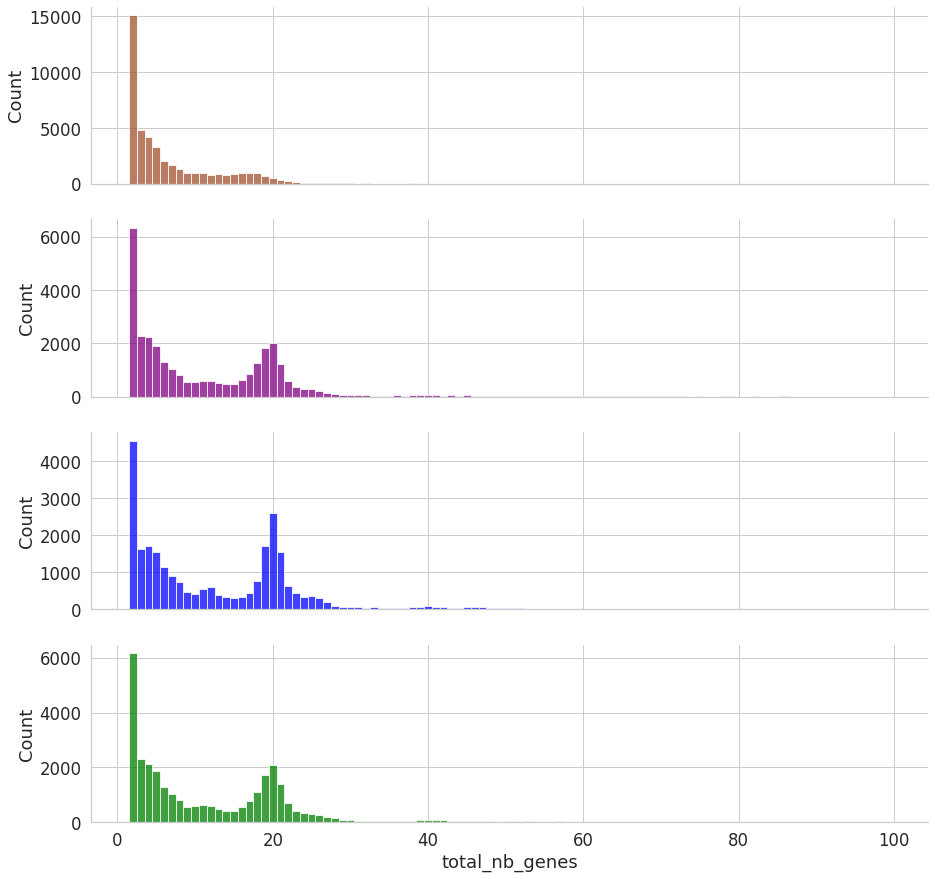

In [67]:
hogprofiles = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]<100]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15,15))
axis=[ax1, ax2, ax3, ax4]
colors=("sienna", "purple", "blue", "green" ) # https://medium.com/swlh/how-to-create-a-seaborn-palette-that-highlights-maximum-value-f614aecd706b
for i in range(len(metfol)): 
    tmphogprofiles = hogprofiles.loc[hogprofiles["Method"]==metfol[i]]
    currentaxis = axis[i]
    fig = sns.histplot(tmphogprofiles, color=colors[i], x='total_nb_genes', bins=100, discrete=True, ax=currentaxis)
    sns.despine()

OMAAugustus20
0
OMARP20
0
OMAtopNCBI20
1
OMAprimNCBI20
1
OMAtopEnsembl20
0
OMAprimEnsembl20
0


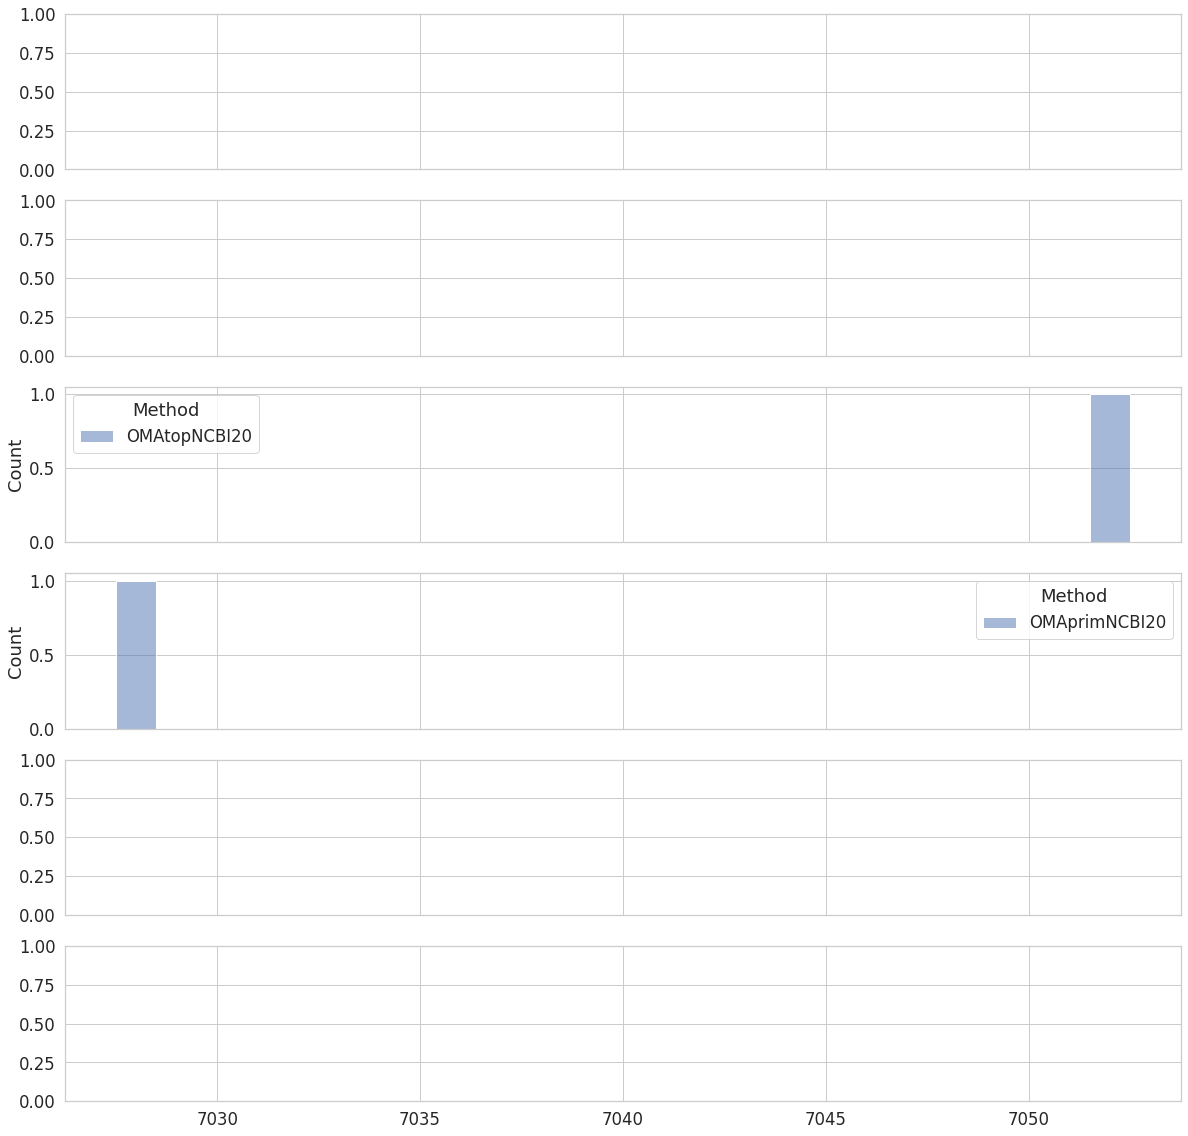

In [34]:
hogprofiles = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]>5000 ]
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, figsize=(20,20))
axis=[ax1, ax2, ax3, ax4, ax5, ax6]
for i in range(len(allmetfol)): 
    tmphogprofiles = hogprofiles.loc[hogprofiles["Method"]==allmetfol[i]]
    print(allmetfol[i])
    print(len(tmphogprofiles))
    currentaxis = axis[i]

    fig = sns.histplot(tmphogprofiles, hue='Method', x='total_nb_genes', discrete=True, ax=currentaxis)

In [8]:
HOGstats.reset_index(drop=True)

,Measure,OMAAugustus20,OMARP20,OMAtopNCBI20,OMAprimNCBI20,OMAtopEnsembl20,OMAprimEnsembl20
0,HOG_count,45153.000000,30658.000000,26678.000000,26608.000000,30576.000000,30494.000000
1,mean,7.674064,12.281003,14.522153,14.478127,12.711310,12.500820
2,std,19.337774,18.713006,47.656591,47.843938,18.299504,17.563107
3,min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
4,25%,2.000000,3.000000,4.000000,4.000000,3.000000,3.000000
5,50%,4.000000,8.000000,11.000000,11.000000,8.000000,8.000000
6,75%,10.000000,19.000000,20.000000,20.000000,19.000000,19.000000
7,max,1705.000000,1024.000000,7052.000000,7028.000000,883.000000,796.000000


In [9]:
HOGstats_inv= HOGstats.transpose()
new_header = HOGstats_inv.iloc[0] #grab the first row for the header
HOGstats_inv = HOGstats_inv[1:] #take the data less the header row


In [10]:
HOGstats_inv
new_header.to_list()

['HOG_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [11]:
HOGstats_inv.columns = new_header.to_list() #set the header row as the df header

In [12]:
HOGstats_inv = HOGstats_inv.reset_index()
HOGstats_inv=HOGstats_inv.rename(columns={"index": "Method"})

In [13]:
HOGstats_inv.columns

Index(['Method', 'HOG_count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max'],
      dtype='object')

In [26]:
HOGstats

,Measure,OMAAugustus20,OMARP20,OMAtopNCBI20,OMAprimNCBI20,OMAtopEnsembl20,OMAprimEnsembl20
0,HOG_count,45153.000000,30658.000000,26678.000000,26608.000000,30576.000000,30494.000000
1,mean,7.674064,12.281003,14.522153,14.478127,12.711310,12.500820
2,std,19.337774,18.713006,47.656591,47.843938,18.299504,17.563107
3,min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
4,25%,2.000000,3.000000,4.000000,4.000000,3.000000,3.000000
5,50%,4.000000,8.000000,11.000000,11.000000,8.000000,8.000000
6,75%,10.000000,19.000000,20.000000,20.000000,19.000000,19.000000
7,max,1705.000000,1024.000000,7052.000000,7028.000000,883.000000,796.000000


<AxesSubplot:xlabel='Method', ylabel='HOG_count'>

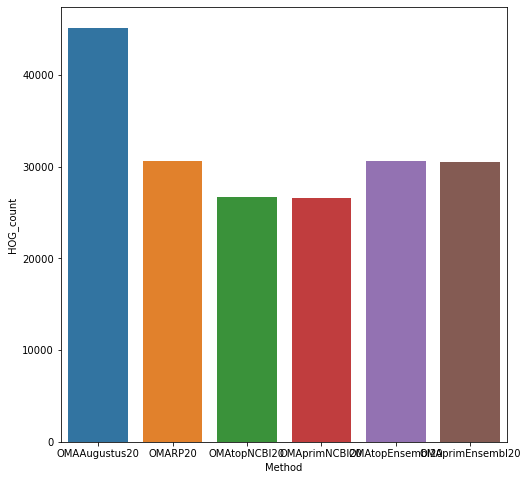

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=HOGstats_inv, x='Method', y='HOG_count')

In [115]:
hog_profiles_total

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,...,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method
0,HOG00001,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
1,HOG00002,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
3,HOG00004,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
4,HOG00005,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190162,HOG30490,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAprimEnsembl20
190163,HOG30491,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAprimEnsembl20
190164,HOG30492,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAprimEnsembl20
190165,HOG30493,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAprimEnsembl20


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

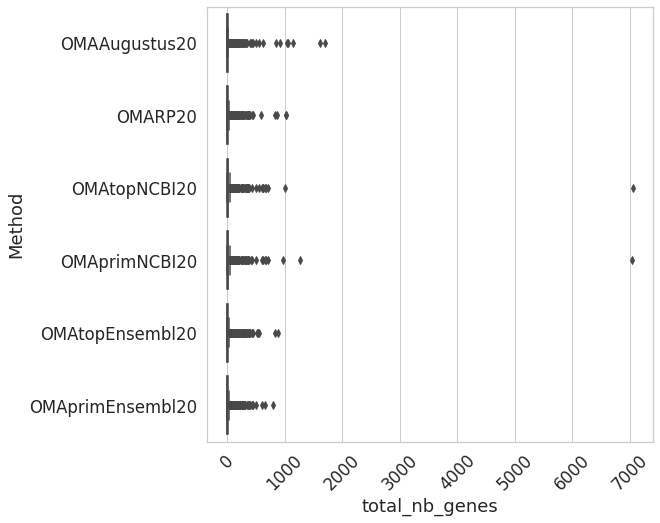

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
fig = sns.boxplot(data=hog_profiles_total, y='Method', x='total_nb_genes') #, showfliers=False

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45)

In [99]:
## Stats per species per method

Measure=['HOG_count', 'mean','std', 'min', '25%', '50%', '75%', 'max']
HOGstats2=pd.DataFrame(data=Measure, columns=['Measure'])
for m in metfol:
    working_dir =  '/users/sprietob/mywork/' + m
    hog_profiles_df = pd.read_csv(working_dir + '/Output/PhyleticProfileHOGs.txt', skiprows=4, sep="\t")
    
    species=hog_profiles_df.columns.tolist()[1:]

    for sp in species:
        tmp_df=hog_profiles_df[(hog_profiles_df[sp]>0)]
        print(tmp_df)
        print(len(tmp_df))
        #tmp_df['total_nb_genes'] = tmp_df.select_dtypes(include='number').sum(axis=1)
        
    
    #tmp_series=hog_profiles_df['total_nb_genes'].describe()
    #tmp_df=tmp_series.to_frame()
    #current=tmp_df['total_nb_genes'].tolist()
    #HOGstats[m]=current



          Group  CHICK  CHPIB  CIOIN  DANRE  ECNAU  ERCAL  FELCA  GADMO  \
12972  HOG12973      1      0      0      0      0      0      0      0   
12973  HOG12974      1      0      0      0      0      0      0      0   
12974  HOG12975      1      0      0      0      0      0      0      0   
12975  HOG12976      1      0      0      0      0      0      0      0   
12976  HOG12977      1      0      0      0      0      0      0      0   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
45016  HOG45017      1      0      1      0      0      0      0      0   
45017  HOG45018      1      0      1      0      0      0      0      0   
45018  HOG45019      1      0      1      0      0      0      0      0   
45019  HOG45020      1      0      1      0      0      0      0      0   
45020  HOG45021      1      0      1      0      0      0      0      0   

       HUMAN  ...  LEPOC  MOUSE  ORANA  ORYLA  PHOSI  PODMU  SALTR  SARHA  \
12972      0  ...     

          Group  CHICK  CHPIB  CIOIN  DANRE  ECNAU  ERCAL  FELCA  GADMO  \
7336   HOG07337      1      0      0      0      0      0      0      0   
7337   HOG07338      2      0      0      0      0      0      0      0   
7338   HOG07339      1      0      0      0      0      0      0      0   
7339   HOG07340      3      0      0      0      0      0      0      0   
7340   HOG07341      1      0      0      0      0      0      0      0   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
30473  HOG30474      1      0      1      0      0      0      0      0   
30474  HOG30475      1      0      1      0      0      0      0      0   
30475  HOG30476      1      0      1      0      0      0      0      0   
30476  HOG30477      1      1      1      0      0      0      0      0   
30477  HOG30478      1      0      1      0      0      0      0      0   

       HUMAN  ...  LEPOC  MOUSE  ORANA  ORYLA  PHOSI  PODMU  SALTR  SARHA  \
7336       0  ...     

In [ ]:
working_dir = '/users/sprietob/mywork/OMAtopNCBI20'

In [ ]:
#get the number of genes per hog, per species
hog_profiles_df = pd.read_csv(working_dir + '/Output/PhyleticProfileHOGs.txt', skiprows=4, sep="\t")
hog_profiles_df["total_nb_genes"] = hog_profiles_df.sum(axis=1)
hog_profiles_df[:10]

In [31]:
hog_profiles_df['total_nb_genes'].describe()

count    30658.000000
mean        12.281003
std         18.713006
min          2.000000
25%          3.000000
50%          8.000000
75%         19.000000
max       1024.000000
Name: total_nb_genes, dtype: float64